In [19]:
%matplotlib inline
import pandas as pd
import random as rnd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

Step 1) load the datafiles into dataframes to better handling and joining for the KS tests.

In [2]:
#Colony dataframes
bishayee_colony = pd.read_excel("Bishayee Colony Counts 10.27.97-3.8.01.xlsx", skiprows=2,na_values=" ")
outside3_colony = pd.read_excel("Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx", skiprows=1)
others_colony = pd.read_excel("Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx", skiprows=1)
#Coulter dataframes
bishayee_coulter = pd.read_excel("Bishayee Coulter Counts.10.20.97-7.16.01.xlsx", skiprows=1)
others_coulter = pd.read_excel("Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx", skiprows=1)
    #This data file had no header, introduced manually
outside1_coulter = pd.read_excel("Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx")
outside1_coulter.columns = ["Experiment", "C1", "C2", "C3","Average","Date"]
outside2_coulter = pd.read_excel("Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx", skiprows=1)

The following step is to verify the magnitudes of the data in the sets for the coulter and the colony. From the description of the experimental set-up, it seems that the count of the cells using the coulter and the colony count are actually individual experiments with different methods. Hence, they should be analyzed independently

In [3]:
bishayee_colony["Inv"] = "Z"
bishayee_colony.drop('ISOTOPE', axis=1, inplace=True)
bishayee_colony2 = bishayee_colony.iloc[:,[0,1,6,2,3,4,5]]
bishayee_colony2.columns
bishayee_colony2.rename(columns={'Bate # B0/B00':'Batch'},inplace = True)
bishayee_colony2.drop('Batch', axis=1, inplace=True)
others_colony2 = others_colony.rename(columns={'Bates # B00 or B0':'Batch'})
others_colony2.drop('Batch', axis=1, inplace=True)
outside3_colony["Inv"] = "O"
outside3_colony2=outside3_colony.iloc[:,[0,5,1,2,3,4]]
outside3_colony2.rename(columns={'date':'Date','c1':'col1','c2':'col2','c3':'col3'},inplace = True)
df_total = [bishayee_colony2,others_colony2,outside3_colony2]
merged_colony_data = pd.concat(df_total)

Completeness test of the combined colony data

In [4]:
print merged_colony_data.size == bishayee_colony2.size + others_colony2.size + outside3_colony2.size
merged_colony_data.drop("Date",axis =1,inplace=True)
colony_orginal_count =  merged_colony_data.index.size

True
2033


In [5]:
bishayee_coulter2 = bishayee_coulter.drop('Bates', axis=1)
bishayee_coulter2["Inv"] = "Z"
bishayee_coulter2 = bishayee_coulter2.iloc[:,[0,5,1,2,3,4]]
bishayee_coulter2.rename(columns={'Count 1':'col1','Count 2':'col2','Count 3':'col3'},inplace=True)
outside1_coulter2 = outside1_coulter.drop('Experiment', axis = 1)
outside1_coulter2["Inv"] = "O1"
outside1_coulter2 = outside1_coulter2.iloc[:,[4,5,0,1,2,3]]
outside1_coulter2.rename(columns={'C1':'col1','C2':'col2','C3':'col3'},inplace=True)
outside2_coulter2 = outside2_coulter.rename(columns={'Count 1':"col1",'Count 2':"col2",'Count 3':"col3"})
outside2_coulter2["Inv"] = "O2"
outside2_coulter2 = outside2_coulter2.iloc[:,[0,5,1,2,3,4]]
others_coulter2 = others_coulter.drop('Bates No.', axis = 1)
others_coulter2.rename(columns={'Coul 1':'col1','Coul 2':'col2','Coul 3':'col3','Investigator':'Inv'},\
                       inplace=True)
others_coulter2 = others_coulter2.iloc[:,[0,5,1,2,3,4]]
df_total_coulter = [bishayee_coulter2,others_coulter2,outside1_coulter2,outside2_coulter2]
merged_coulter_data = pd.concat(df_total_coulter)

completenes of the coulter data

In [6]:
print merged_coulter_data.size == bishayee_coulter2.size + others_coulter2.size + outside1_coulter2.size \
+ outside2_coulter2.size
merged_coulter_data.drop("Date",axis =1,inplace=True)
coulter_orginal_count = merged_coulter_data.index.size

True
2965


In [7]:
merged_coulter_data = merged_coulter_data.dropna()
merged_coulter_data["LowerRatio"] = 0
merged_coulter_data["UpperRatio"] = 0
merged_coulter_data=merged_coulter_data.dropna()
merged_coulter_data.reset_index(drop=True)
for i in range(0,len(merged_coulter_data)):
    temp_array = np.ones(3)
    for k in range(0,3):
        temp_array[k] = merged_coulter_data.iloc[i,(1+k)]
    temp_array = np.sort(temp_array)
    temp_l = (temp_array[1]-temp_array[0])/(temp_array[2]-temp_array[0])
    temp_u = (temp_array[2]-temp_array[1])/(temp_array[2]-temp_array[0])
    merged_coulter_data.iloc[i,5] = temp_l
    merged_coulter_data.iloc[i,6] = temp_u
    if (merged_coulter_data.iloc[i,5]) == 0 and (merged_coulter_data.iloc[i,6]) != 1:
        print "data issues"

In [8]:
merged_colony_data["LowerRatio"] = 0
merged_colony_data["UpperRatio"] = 0
merged_colony_data.replace(r'\s*',np.nan, regex=True )
merged_colony_data=merged_colony_data.dropna()
merged_colony_data.reset_index(drop=True)
messup_rows=[]
for i in range(0,len(merged_colony_data)):
    temp_array = np.ones(3)
    for k in range(0,3):
        if type(merged_colony_data.iloc[i,(1+k)]) == str or type(merged_colony_data.iloc[i,(1+k)]) == unicode:
            messup_rows.append(i)
            continue
        else:
            temp_array[k] = merged_colony_data.iloc[i,(1+k)]
    temp_array = np.sort(temp_array)
    temp_l = (temp_array[1]-temp_array[0])/(temp_array[2]-temp_array[0])
    temp_u = (temp_array[2]-temp_array[1])/(temp_array[2]-temp_array[0])
    merged_colony_data.iloc[i,5] = temp_l
    merged_colony_data.iloc[i,6] = temp_u
merged_colony_data=merged_colony_data.drop(messup_rows)
for i in range(0,len(merged_colony_data)):
    if (merged_colony_data.iloc[i,5]) == 0 and (merged_colony_data.iloc[i,6]) != 1:
        print "data issues"

In [63]:
colony_ur = merged_colony_data.as_matrix(['UpperRatio'])
colony_ur=np.squeeze(colony_ur)
colony_ur = colony_ur[~np.isnan(colony_ur)]
colony_lr = merged_colony_data.as_matrix(['LowerRatio'])
colony_lr=np.squeeze(colony_ur)
colony_lr = colony_lr[~np.isnan(colony_lr)]
coulter_ur = merged_coulter_data.as_matrix(['UpperRatio'])
coulter_ur=np.squeeze(coulter_ur)
coulter_lr = merged_coulter_data.as_matrix(['LowerRatio'])
coulter_lr=np.squeeze(coulter_lr)

In [64]:
#Print empirical CDF plot from a data vector x. 
def cdf_plot(x):
    x_data = np.sort(x)
    y_data = 1. * np.arange(len(x_data))/(len(x_data)-1)
    plt.plot(x_data, y_data)

(2873,)


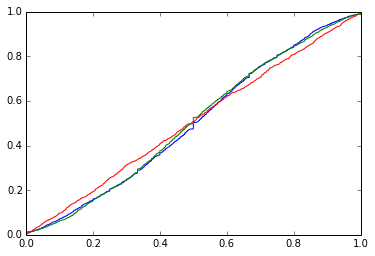

In [87]:
print coulter_ur.shape 
sample_uniform = np.random.uniform(0,1,1000)
cdf_plot(coulter_ur)
cdf_plot(coulter_lr)
cdf_plot(sample_uniform)

(2007,)


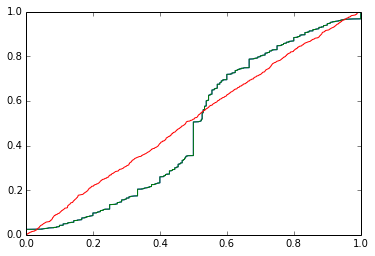

In [88]:
print colony_ur.shape
sample_uniform = np.random.uniform(0,1,1000)
cdf_plot(colony_ur)
cdf_plot(colony_lr)
cdf_plot(sample_uniform)

In [67]:
def ReturnSample(l,n):
    indexes=rnd.sample(range(1,len(l)),n)  
    return np.asarray([l[i] for i in indexes])

In [91]:
sample_test = ReturnSample(colony_ur,1000)
stats.kstest((sample_test), 'uniform', N=10000000)

(0.17400000000000002, 0.0)

In [90]:
sample_test = ReturnSample(coulter_ur,1000)
stats.kstest((sample_test), 'uniform', N=10000)

(0.069333333333333358, 0.00012646852299291744)